# Big Ideas Final Project
## Group - Jack Haggerty, Chang Li, Daniel Sawyer 

# Introduction

## Description of Datasets

### Jack Haggerty

The amount of crime in an area has a great influence on where someone might want to live. The dataset I chose was a Police Incident Blotter.  This dataset contains the most recent police reports taken in a given area.  Based off of this information, we can infer the amount of suspicious activity that occurs in a given neighborhood.

### Chang Li


### Daniel Sawyer
Fire incidents could have an impact on how people live. The more likely a fire to start in a neighborhood the less desireable the neighborhood is. This data set has information on fire incidents in Pittsburgh. 

# The Metric

## Police Incidents per Neighborhood - Jack Haggerty

First step is to read in CSV file and store data in policeIncidents_data variable.  I then created a dictionary so I can keep track of frequency of police incidents per neighboorhood.

In [16]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
policeIncidents_data = pd.read_csv("PoliceIncidentBlotter.csv")

policeIncidents_dict = dict()


The next step is creating a for loop to load up frequency of incidents per neighborhood.  After that, I created a series, dataPoliceIncidents_series, for better organization.  

In [14]:
for i in range(len(policeIncidents_data)):
    item = policeIncidents_data.loc[i, 'INCIDENTNEIGHBORHOOD']
    if item in policeIncidents_dict: 
        policeIncidents_dict[item] += 1 
    else:
        policeIncidents_dict[item] = 1 
        
dataPoliceIncidents_series = pd.Series(policeIncidents_dict, name = "Incident")

dataPoliceIncidents_series.sort_values()[:]



Mt. Oliver Boro               2
Allegheny West                2
New Homestead                 2
Ridgemont                     2
Esplen                        2
                             ..
Marshall-Shadeland           51
East Liberty                 60
Brookline                    67
Carrick                      67
Central Business District    95
Name: Incident, Length: 95, dtype: int64

My choosen data visualization was a bar graph.  The graph below shows the 20 neighborhoods with the lowest police incidents.  

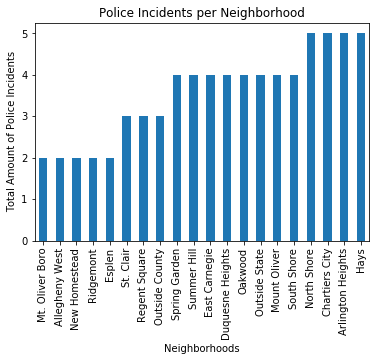

In [17]:
%matplotlib inline

from matplotlib import pyplot as plt

dataPoliceIncidents_series.sort_values(ascending=True)[:20].plot.bar()
plt.title('Police Incidents per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Amount of Police Incidents')
plt.show()

## Chang Li 

## Daniel Sawyer
## Fire Incidents per Neighborhood
First, read in the .csv data into a data frame, and create a dictionary.

In [2]:
import pandas as pd
fire_data = pd.read_csv("Fire Incidents.csv")
fireIncidentsDict = dict()

Then, go through the dataframe and record each case of a fire incident in the dictionary

In [4]:
for i in range(len(fire_data)):
    item = fire_data.loc[i, 'neighborhood']
    if item in fireIncidentsDict: 
        fireIncidentsDict[item] += 1 
    else:
        fireIncidentsDict[item] = 1 
        
dataFireIncidents_series = pd.Series(fireIncidentsDict, name = "Incident")

dataFireIncidents_series.sort_values()[:]

Mount Oliver Borough           12
Regent Square                  12
Mt. Oliver                     14
East Carnegie                  16
Arlington Heights              22
                             ... 
Squirrel Hill South           380
South Side Flats              382
Central Business District     392
Carrick                       452
NaN                          1526
Name: Incident, Length: 92, dtype: int64

Finally, display the information in a bar graph

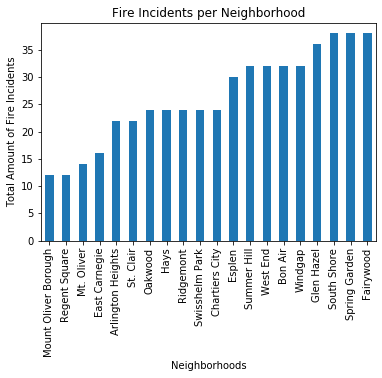

In [6]:
from matplotlib import pyplot as plt

dataFireIncidents_series.sort_values(ascending=True)[:20].plot.bar()
plt.title('Fire Incidents per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Amount of Fire Incidents')
plt.show()

# The Best Neighboorhood

## Jack Haggerty's Results

According to my bar graph, the best neighborhoods are Mt. Oliver Boro, Allegheny West, New Homestead,  Ridgemont, and Esplen.  All of these neighborhoods were all only had 2 incidents with the police.

## Chang Li 

## Daniel Sawyer

# Conclusion